In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

55.563768484813096 -8.244050371611905
31.068249781105948 -15.058083796577563
-51.561657584453805 -172.0779528681353
-5.919224805461397 169.81435136655745
-24.490167130091493 148.86391465837278
-81.84450781907778 131.2533388354396
60.39801597149858 -79.43512876350707
17.522523225610684 -62.99159511877981
-36.60585020535812 6.454515597760889
84.6035029076142 -134.51556469886046
59.99912795594085 74.85381611385631
-85.86840771369144 -101.71186116076345
1.586380101569702 -25.568516741255905
72.2223856844453 -162.80706944225926
74.3509542985 37.5107423498917
42.7069719500858 -146.83941263102884
-89.0178151883346 -65.95934651416214
-45.643269553374175 104.4239470754801
68.17220800080636 7.793229675268094
-46.27758996520658 70.64087740537926
-25.468225471484516 151.4287115692747
57.50354776306375 -110.70058852939425
17.3630729301898 55.177274179741005
81.98722231265612 58.23225711849085
-66.48133988532844 43.50501455178011
-28.568819316749867 33.96418099569652
-0.31283579670758854 -32.4881560

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list with enumerate() method.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | letterkenny
Processing Record 2 of Set 1 | porto santo
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | blackwater
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | golden rock
City not found. Skipping...
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | lokosovo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | sistranda
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | 

Processing Record 38 of Set 4 | sirur
Processing Record 39 of Set 4 | pemangkat
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | strangnas
Processing Record 44 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | kasamwa
Processing Record 48 of Set 4 | agua verde
Processing Record 49 of Set 4 | carikar
City not found. Skipping...
Processing Record 50 of Set 4 | bobonong
City not found. Skipping...
Processing Record 1 of Set 5 | arona
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | envira
Processing Record 4 of Set 5 | tiznit
Processing Record 5 of Set 5 | road town
Processing Record 6 of Set 5 | bluff
Processing Record 7 of Set 5 | humaita
Processing Record 8 of Set 5 | santiago del estero
Processing 

Processing Record 22 of Set 8 | bitkine
Processing Record 23 of Set 8 | lyantonde
Processing Record 24 of Set 8 | tres arroyos
Processing Record 25 of Set 8 | mabaruma
Processing Record 26 of Set 8 | churapcha
Processing Record 27 of Set 8 | umm lajj
Processing Record 28 of Set 8 | quimper
Processing Record 29 of Set 8 | saint-joseph
Processing Record 30 of Set 8 | batsfjord
Processing Record 31 of Set 8 | camacha
Processing Record 32 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 33 of Set 8 | salamiyah
Processing Record 34 of Set 8 | bonthe
Processing Record 35 of Set 8 | praia
Processing Record 36 of Set 8 | beian
Processing Record 37 of Set 8 | sturgeon falls
Processing Record 38 of Set 8 | port-gentil
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | henties bay
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | yaan
Processing Record 44 of Set 8 | south venice
Processing Reco

Processing Record 8 of Set 12 | taoudenni
Processing Record 9 of Set 12 | segou
Processing Record 10 of Set 12 | abay
Processing Record 11 of Set 12 | hovd
Processing Record 12 of Set 12 | yuksekova
Processing Record 13 of Set 12 | port lincoln
Processing Record 14 of Set 12 | marcona
City not found. Skipping...
Processing Record 15 of Set 12 | thunder bay
Processing Record 16 of Set 12 | el cobre
Processing Record 17 of Set 12 | saint anthony
Processing Record 18 of Set 12 | los llanos de aridane
Processing Record 19 of Set 12 | duvan
Processing Record 20 of Set 12 | dawei
Processing Record 21 of Set 12 | eydhafushi
Processing Record 22 of Set 12 | kendari
Processing Record 23 of Set 12 | porto de moz
Processing Record 24 of Set 12 | tikrit
Processing Record 25 of Set 12 | lloydminster
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | preobrazheniye
Processing Record 28 of Set 12 | semenivka
Processing Record 29 of Set 12 | san rafa

In [12]:
# Tally number of cities.
len(city_data)

539

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Letterkenny,54.9500,-7.7333,63.23,94,100,2.06,IE,2022-07-18 23:25:57
1,Porto Santo,33.0720,-16.3415,68.38,77,40,8.05,PT,2022-07-18 23:25:57
2,Vaini,-21.2000,-175.2000,78.96,83,40,12.66,TO,2022-07-18 23:25:57
3,Lata,40.1629,-8.3327,59.59,97,10,1.21,PT,2022-07-18 23:25:58
4,Blackwater,-23.5833,148.8833,62.37,47,2,6.46,AU,2022-07-18 23:25:58
5,New Norfolk,-42.7826,147.0587,44.92,87,78,2.55,AU,2022-07-18 23:25:58
6,Saldanha,-33.0117,17.9442,50.05,79,0,10.16,ZA,2022-07-18 23:25:59
7,Tuktoyaktuk,69.4541,-133.0374,66.20,82,100,10.36,CA,2022-07-18 23:25:59
8,Lokosovo,61.1333,74.8167,59.67,67,92,6.13,RU,2022-07-18 23:25:59
9,Punta Arenas,-53.1500,-70.9167,39.31,87,75,31.07,CL,2022-07-18 23:26:00


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Letterkenny,IE,2022-07-18 23:25:57,54.9500,-7.7333,63.23,94,100,2.06
1,Porto Santo,PT,2022-07-18 23:25:57,33.0720,-16.3415,68.38,77,40,8.05
2,Vaini,TO,2022-07-18 23:25:57,-21.2000,-175.2000,78.96,83,40,12.66
3,Lata,PT,2022-07-18 23:25:58,40.1629,-8.3327,59.59,97,10,1.21
4,Blackwater,AU,2022-07-18 23:25:58,-23.5833,148.8833,62.37,47,2,6.46
5,New Norfolk,AU,2022-07-18 23:25:58,-42.7826,147.0587,44.92,87,78,2.55
6,Saldanha,ZA,2022-07-18 23:25:59,-33.0117,17.9442,50.05,79,0,10.16
7,Tuktoyaktuk,CA,2022-07-18 23:25:59,69.4541,-133.0374,66.20,82,100,10.36
8,Lokosovo,RU,2022-07-18 23:25:59,61.1333,74.8167,59.67,67,92,6.13
9,Punta Arenas,CL,2022-07-18 23:26:00,-53.1500,-70.9167,39.31,87,75,31.07


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658189094.3670592

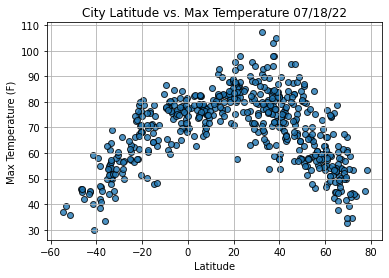

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

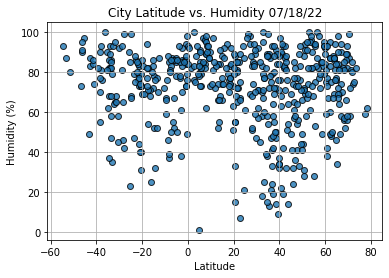

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

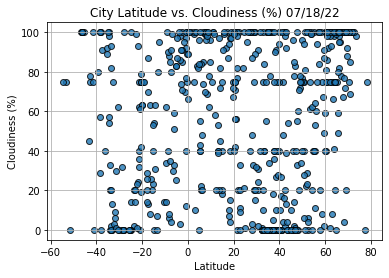

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()